# Understanding Public Health Priorities for Baby Foods

## Data Exploration

This notebook is to explore the prepared data to gain a preliminary insights into the nature of the datasets. This will include both monovariate and multivariate analysis. As part of the workflow, data will be checked, assumptions will be created to ensure good quality of data.

## Configuration

1. **Import Necessary Libraries:**
    
    To ensure the necessary libraries are imported:

In [1]:
# Import the necessary libraries

# Basic python libraries
import os
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

2. **Data Location**

    Data input and output directories are set up to streamline data processing:

In [2]:
# Set output data and output locations
raw_data = "../data/raw/"
interim_data = "../data/interim/"
processed_data = "../data/processed/"

figure_path = "../reports/figures/"
config = "../config/"

4. **DataFrame Display**

    Set the pandas options to display all columns in the DataFrame:

In [3]:
# Set pandas options to display all columns in the DataFrame
pd.set_option('display.max_columns', None)

## Data Loading

The prepared data from the data ingestion notebook is used in the data exploration. 

In [4]:
# Set the filename for your CSV file
csv_filename = "nppm_baby_food.csv"

# Combine the path and filename
csv_filepath = os.path.join(processed_data, csv_filename)

# Load the CSV file into a DataFrame
nppm_baby_food_df = pd.read_csv(csv_filepath)

# Display the loaded DataFrame
nppm_baby_food_df

,category_id,product_name,brand,weight_g,energy_density_input,energy_density_result,fat_density_input,fat_density_result,sugar_density_input,sugar_density_result,protein_density_input,protein_density_result,sodium_density_input,sodium_density_result,protein_percent_input,protein_percent_result,fruit_percent_input,fruit_percent_result,dry_fruit_percent_input,dry_fruit_percent_result,free_sugars_input,free_sugars_result,water_added_input,water_added_result,lower_age_input,lower_age_result,upper_age_input,upper_age_result,serving_size_input,serving_size_result,claims_input,claims_result,assess_name_input,assess_name_result,assess_ingredients_input,assess_ingredients_result,spout_input,spout_result,preparation_input,preparation_result,breastfeeding_input,breastfeeding_result,submission,submission_country,submission_sector,submission_datetime,DisplayString,ISO2,LAND_AREA_KMSQ_2012,LANGUAGES_EN_2012,WHO_REGION,WORLD_BANK_INCOME_GROUP,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,1a Cereal containing milk,Sütlü meyveli pirinçli,Bebelac,200.0,165.000000,pass,3.00,pass,13.2,pass,4.9,pass,40.000000,pass,NaN,NaN,NaN,NaN,10.0,pass,Yes,fail,NaN,NaN,6.0,pass,NaN,NaN,NaN,NaN,Yes,fail,Yes,fail,Yes,fail,NaN,NaN,No,fail,Yes,fail,"{'country': 'TR', 'sector': 'public', 'datetim...",TR,public,2022-11-04 14:20:34.005,Turkiye,TR,"769,630","Turkish, Kurdish, other minority languages",Europe,Upper middle income,2017.0,559.0,TR,Turkey,TU,TUR,TR,TUR,MULTIPOLYGON (((26.060557471096633 39.83759173...
1,1a Cereal containing milk,Sütlü pirinçli,Bebelac,205.0,171.000000,pass,3.90,pass,11.7,pass,5.1,pass,44.000000,pass,NaN,NaN,NaN,NaN,NaN,NaN,Yes,fail,NaN,NaN,6.0,pass,NaN,NaN,NaN,NaN,Yes,fail,Yes,fail,Yes,fail,NaN,NaN,No,fail,Yes,fail,"{'country': 'TR', 'sector': 'public', 'datetim...",TR,public,2022-11-04 14:20:34.005,Turkiye,TR,"769,630","Turkish, Kurdish, other minority languages",Europe,Upper middle income,2017.0,559.0,TR,Turkey,TU,TUR,TR,TUR,MULTIPOLYGON (((26.060557471096633 39.83759173...
2,1a Cereal containing milk,Sütlü muzlu pirinçli,Hero baby,190.0,168.000000,pass,3.80,pass,12.0,pass,5.0,pass,48.000000,pass,NaN,NaN,NaN,NaN,5.0,pass,Yes,fail,NaN,NaN,4.0,fail,NaN,NaN,NaN,NaN,Yes,fail,Yes,fail,Yes,fail,NaN,NaN,No,fail,Yes,fail,"{'country': 'TR', 'sector': 'public', 'datetim...",TR,public,2022-11-04 14:20:34.005,Turkiye,TR,"769,630","Turkish, Kurdish, other minority languages",Europe,Upper middle income,2017.0,559.0,TR,Turkey,TU,TUR,TR,TUR,MULTIPOLYGON (((26.060557471096633 39.83759173...
3,1a Cereal containing milk,Sütlü peynirli pekmezli 8 tahıllı,Hero baby,200.0,205.000000,pass,4.60,pass,17.0,pass,6.8,pass,68.000000,pass,NaN,NaN,NaN,NaN,NaN,NaN,Yes,fail,NaN,NaN,6.0,pass,NaN,NaN,NaN,NaN,Yes,fail,Yes,fail,Yes,fail,NaN,NaN,No,fail,Yes,fail,"{'country': 'TR', 'sector': 'public', 'datetim...",TR,public,2022-11-04 14:20:34.005,Turkiye,TR,"769,630","Turkish, Kurdish, other minority languages",Europe,Upper middle income,2017.0,559.0,TR,Turkey,TU,TUR,TR,TUR,MULTIPOLYGON (((26.060557471096633 39.83759173...
4,1a Cereal containing milk,Sütlü elmalı 8 tahıllı,Hero baby,200.0,209.000000,pass,4.70,pass,15.0,pass,6.5,pass,56.000000,pass,NaN,NaN,NaN,NaN,4.7,pass,Yes,fail,NaN,NaN,6.0,pass,NaN,NaN,NaN,NaN,Yes,fail,Yes,fail,No,pass,NaN,NaN,No,fail,Yes,fail,"{'country': 'TR', 'sector': 'public', 'datetim...",TR,public,2022-11-04 14:20:34.005,Turkiye,TR,"769,630","Turkish, Kurdish, other minority languages",Europe,Upper middle income,2017.0,559.0,TR,Turkey,TU,TUR,TR,TUR,MULTIPOLYGON (((26.060557471096633 39.83759173...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,"3.1b Fruit product, not pureed",Banana,Tree,100.0,91.000000,pass,0.33,pass,12.0,fail,NaN,NaN,1000.000000,fail,NaN,NaN,NaN,NaN,NaN,NaN,No,pass,NaN,NaN,NaN

## Exploratory Data Analysis

In [26]:
# Generate descriptive statistics
nppm_baby_food_df.describe()


,weight_g,energy_density_input,fat_density_input,sugar_density_input,protein_density_input,sodium_density_input,protein_percent_input,fruit_percent_input,dry_fruit_percent_input,water_added_input,lower_age_input,upper_age_input,serving_size_input,submission_datetime,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,fid
count,3993.000000,3207.000000,3778.000000,3753.00000,1583.000000,3500.000000,567.000000,860.000000,1252.000000,57.000000,3721.000000,64.000000,491.000000,3993,3993.0,3993.000000
mean,121.129577,160.642067,3.464436,10.89105,6.097795,1368.586688,9.911113,1.756326,1.576462,25.270175,7.100242,19.812500,41.024036,2023-11-14 02:49:21.243016448,2017.0,695.951165
min,4.800000,16.013384,0.000000,0.00000,0.150000,0.000000,0.021000,0.000000,0.000000,0.000000,4.000000,8.000000,0.400000,2022-11-04 14:20:34.005000,2017.0,3.000000
25%,100.000000,65.000000,0.700000,3.10000,3.100000,0.016000,8.000000,0.000000,0.000000,18.000000,6.000000,12.000000,12.000000,2023-05-12 09:12:50.775000064,2017.0,158.000000
50%,100.000000,87.000000,2.300000,8.10000,4.500000,0.048000,10.000000,0.000000,0.000000,25.000000,6.000000,12.000000,28.000000,2024-02-25 12:00:11.115000064,2017.0,411.000000
75%,130.000000,175.000000,4.300000,13.00000,7.000000,25.742500,10.000000,0.000000,0.000000,30.000000,8.000000,36.000000,61.000000,2024-04-03 12:03:24.667000064,2017.0,559.000000
max,720.000000,1770.000000,40.000000,100.00000,41.200000,150000.000000,40.000000,65.000000,59.000000,50.000000,36.000000,60.000000,280.200000,2024-04-23 16:00:32.658000,2017.0,4550.000000
std,61.885606,166.553844,4.348012,12.27904,5.458595,9326.689323,3.762703,6.658983,4.592627,11.309888,2.686566,12.187523,39.760904,NaN,0.0,1141.236521


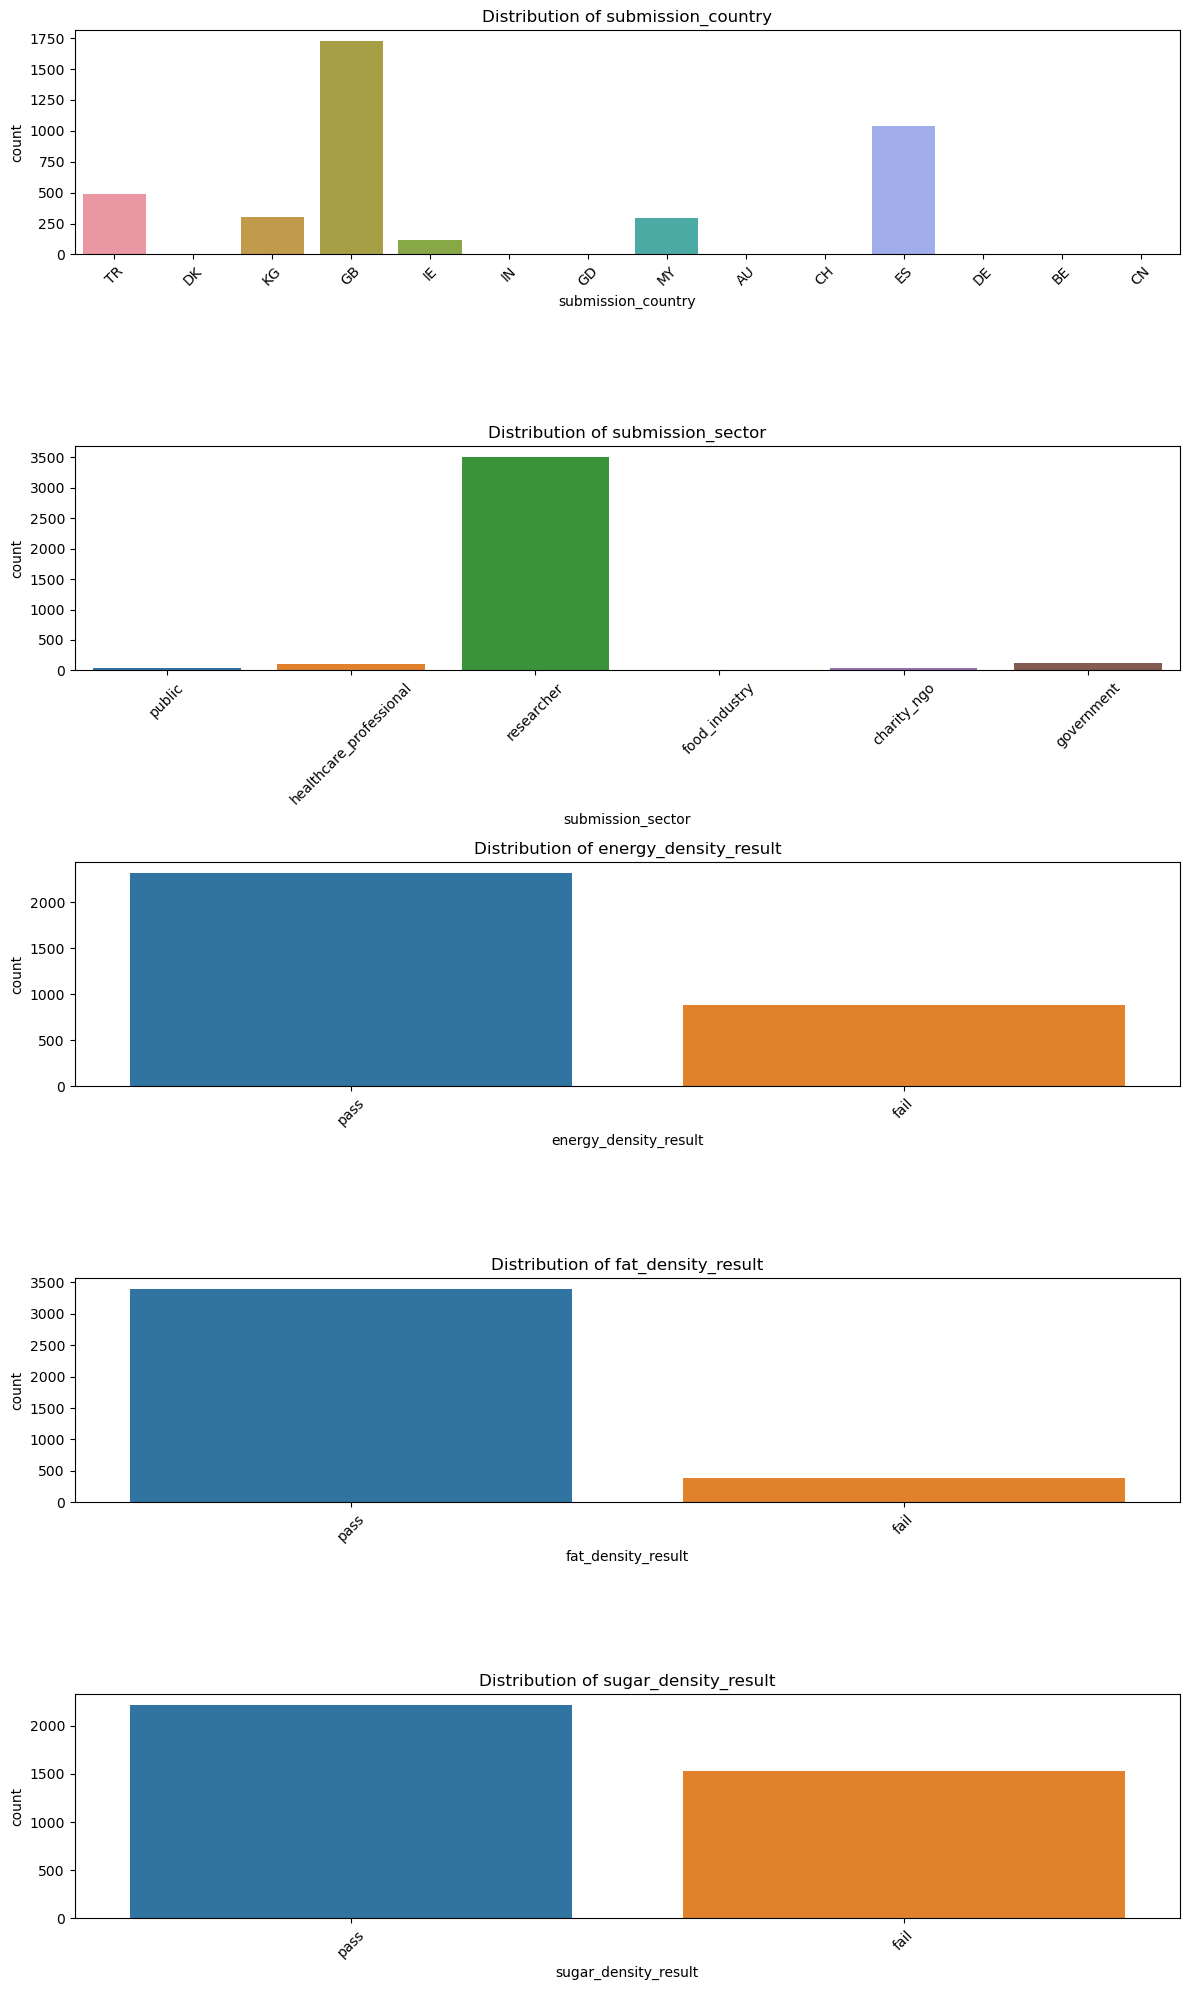

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['submission_country', 'submission_sector', 'energy_density_result', 'fat_density_result', 'sugar_density_result']

# Create a figure for plotting
plt.figure(figsize=(12, 20))

# Plot the distribution of each categorical column
for index, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, index + 1)
    sns.countplot(data=nppm_baby_food_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()
plt.show()


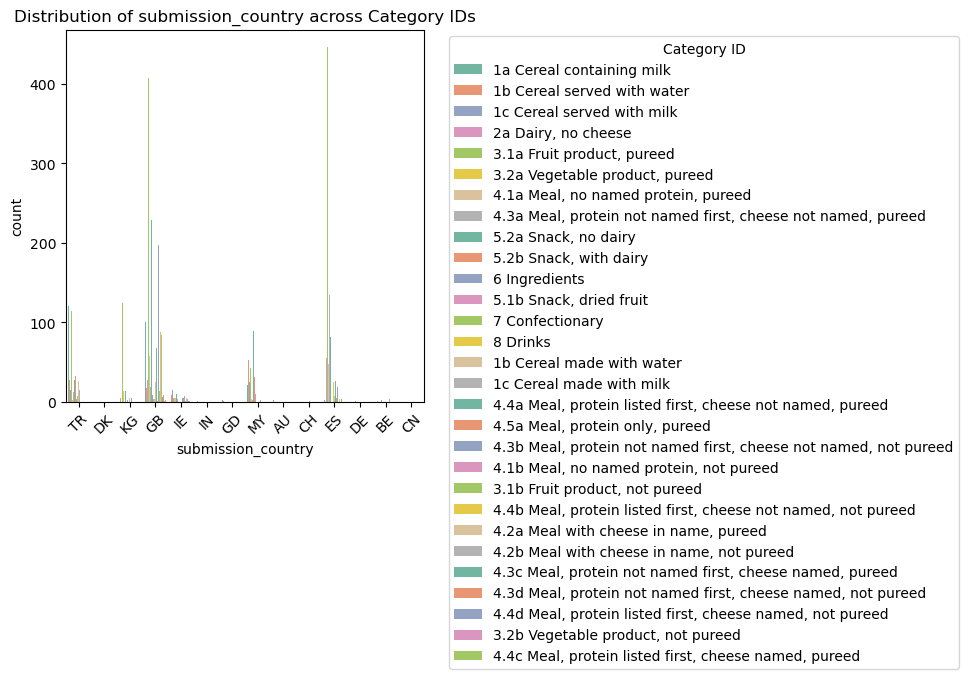

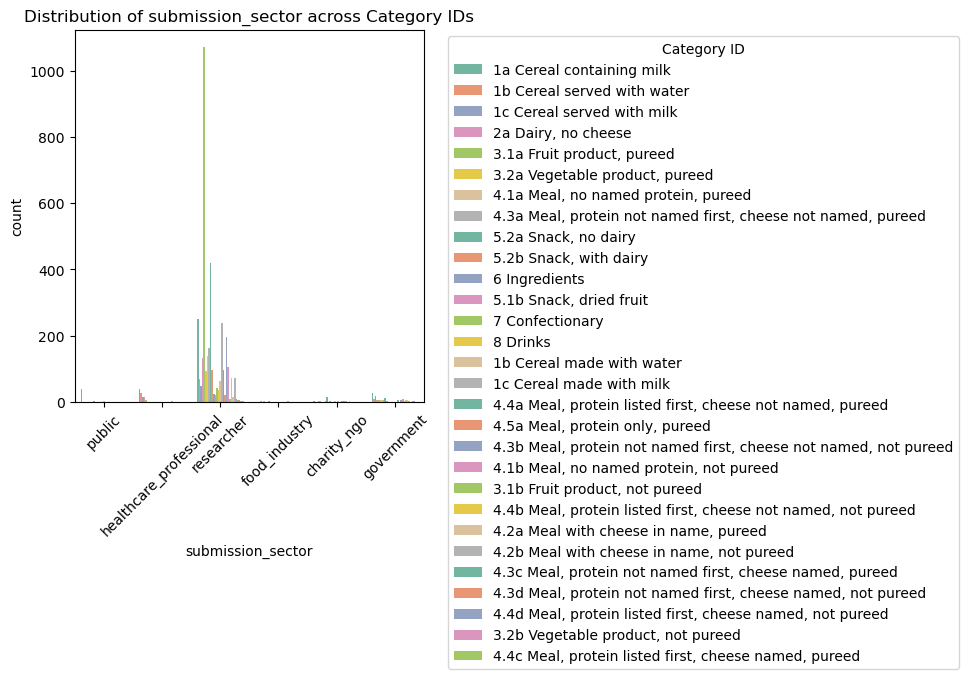

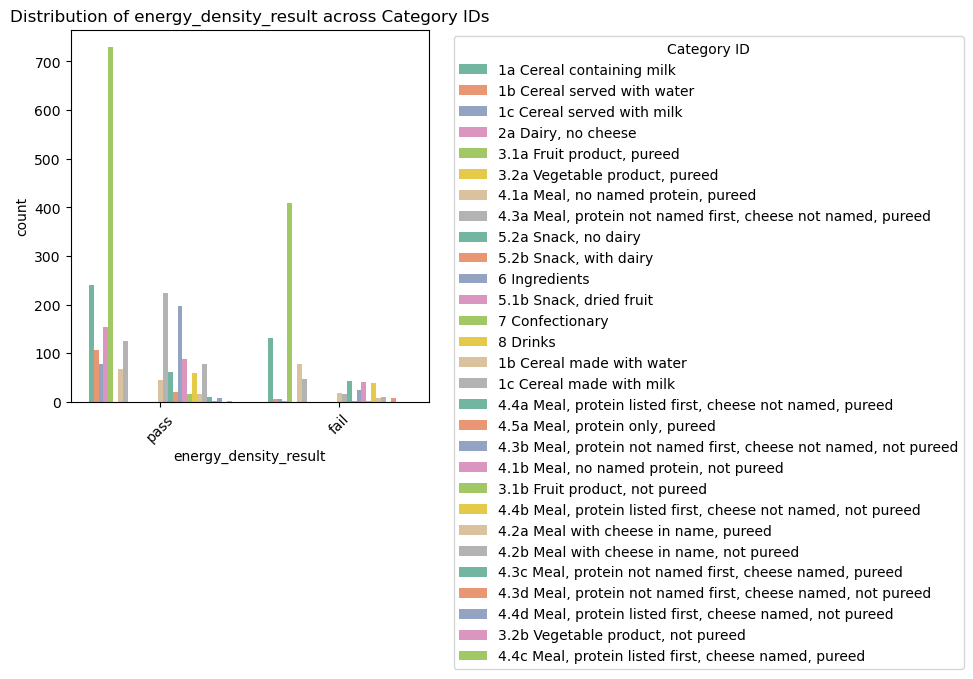

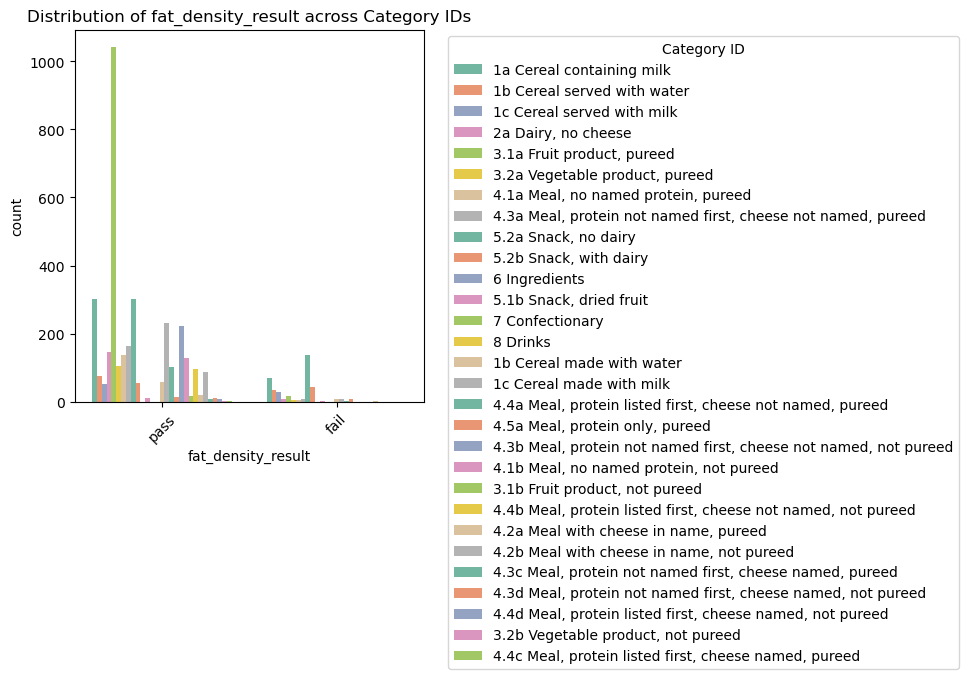

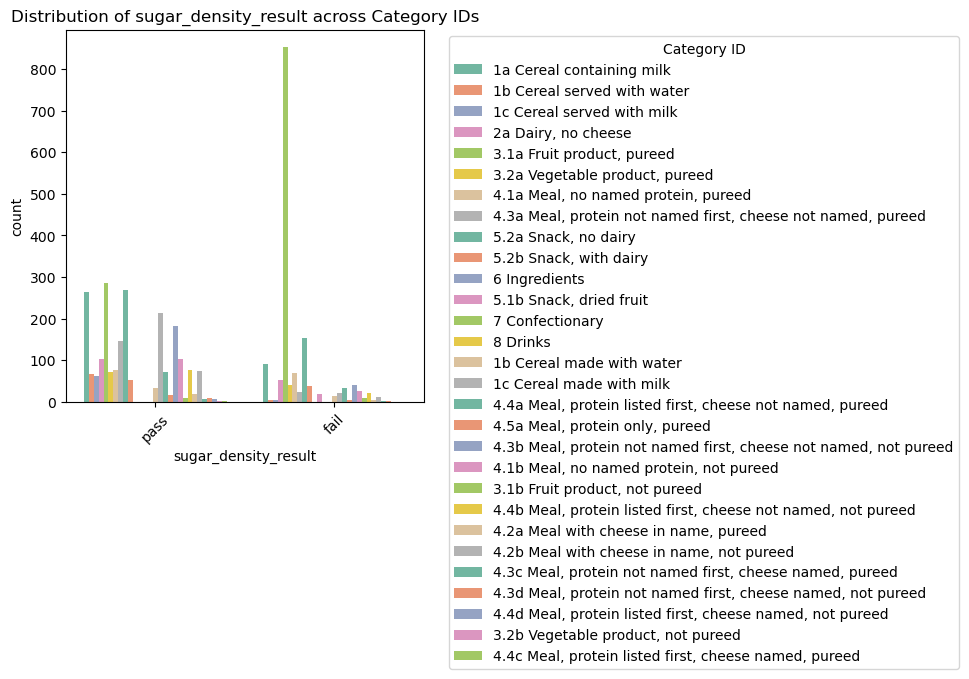

In [33]:
# Plot the distribution of each categorical column across category_id
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=nppm_baby_food_df, x=column, hue='category_id', palette='Set2')
    plt.title(f'Distribution of {column} across Category IDs')
    plt.xticks(rotation=45)
    plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


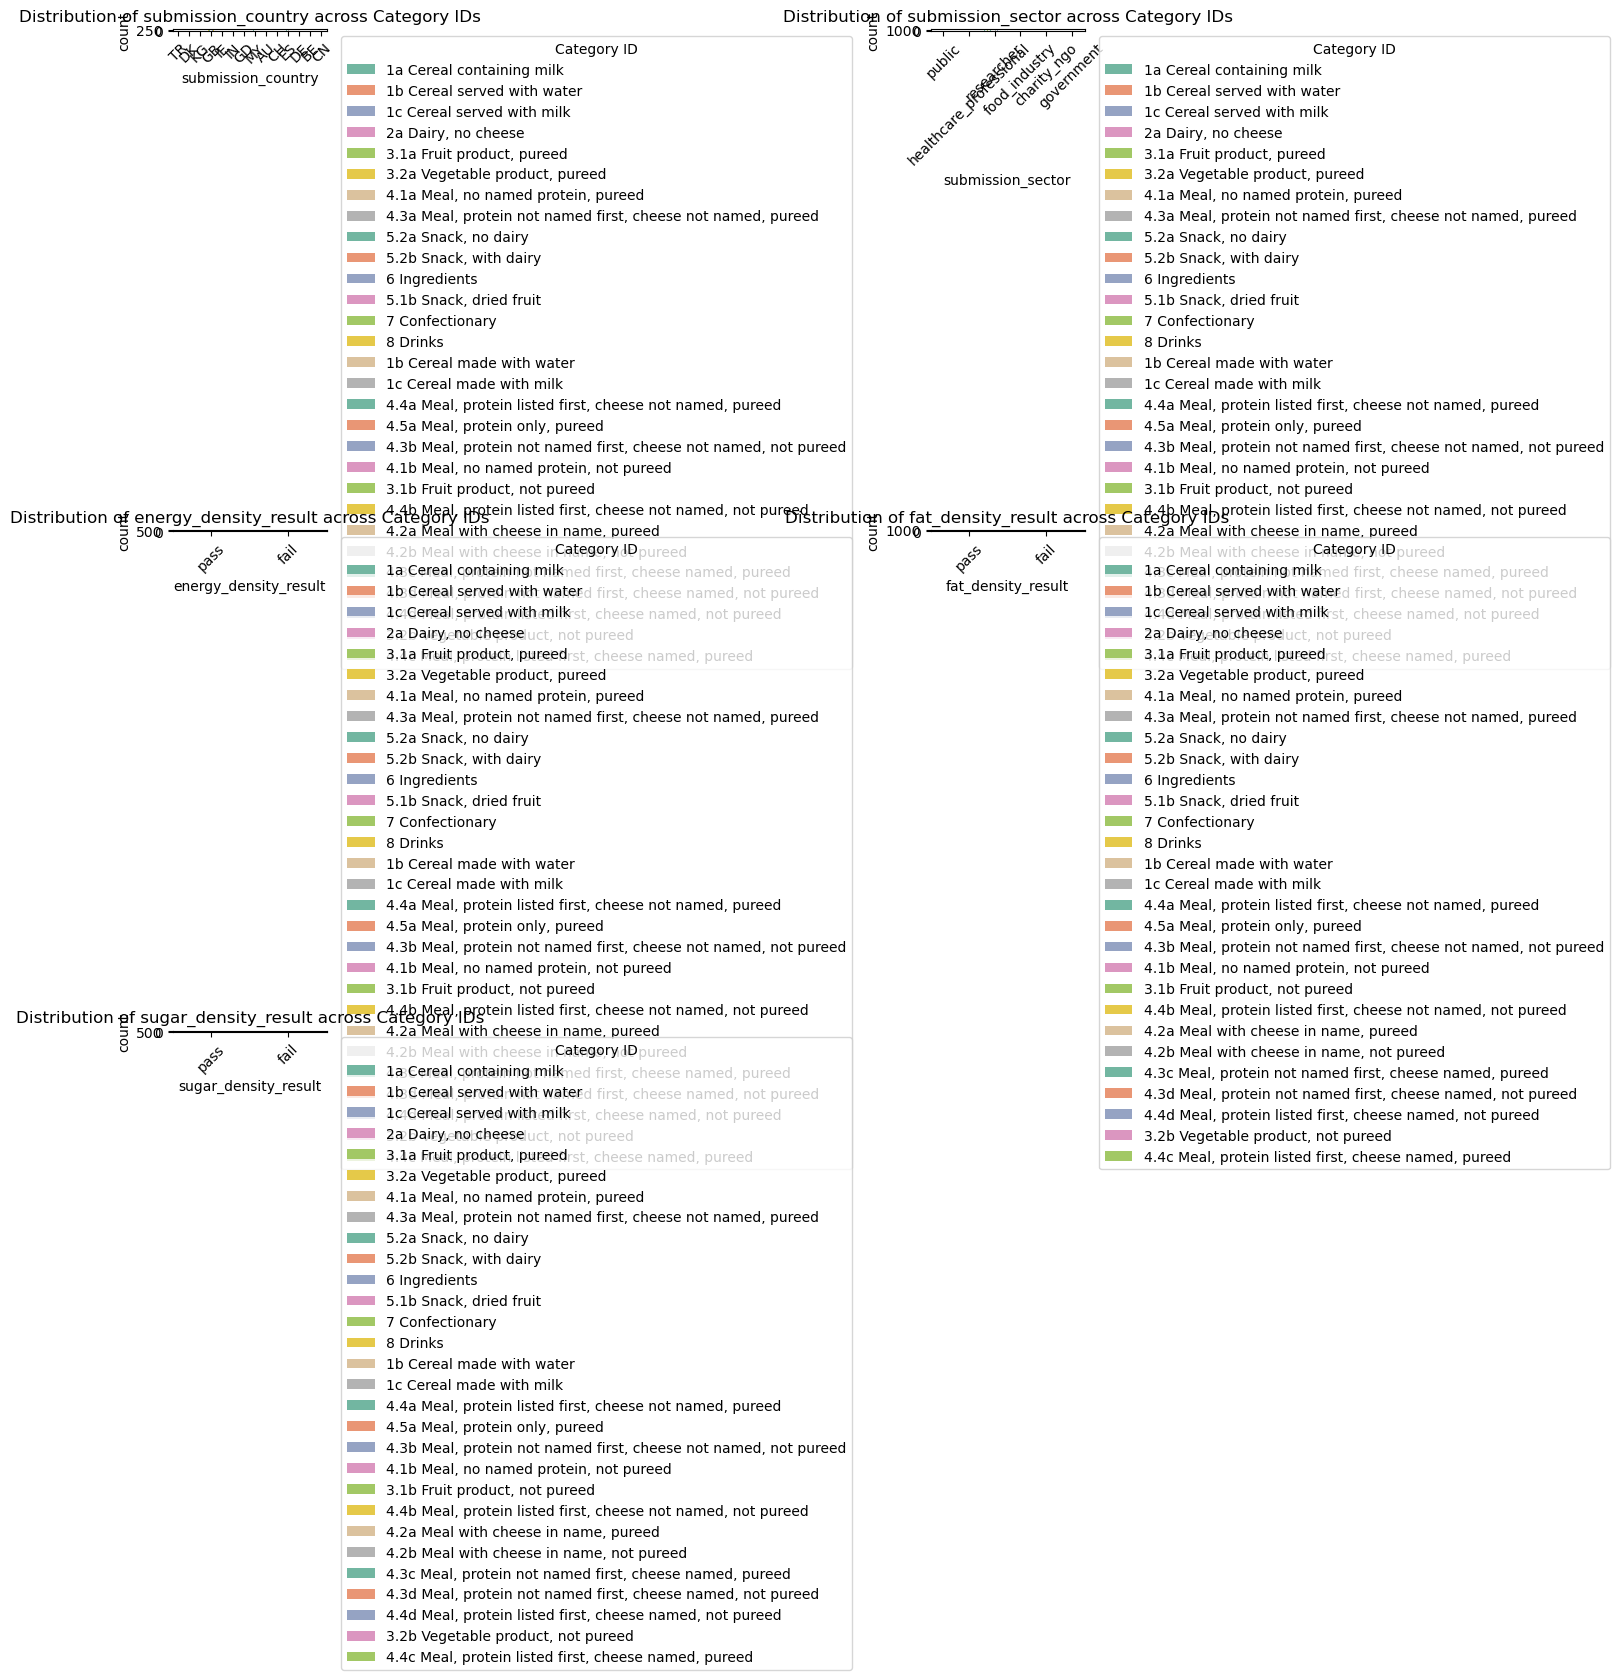

In [35]:
# Determine the number of rows needed for subplots
num_plots = len(categorical_columns)
rows = (num_plots // 2) + (num_plots % 2)

# Create a figure with subplots in a grid
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each categorical column in its subplot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=nppm_baby_food_df, x=column, hue='category_id', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {column} across Category IDs')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# If the number of plots is odd, hide the last ax
if num_plots % 2 != 0:
    axes[-1].set_visible(False)

plt.show()


In [34]:
from scipy.stats import chi2_contingency

# Example for checking independence between category_id and another categorical column
contingency_table = pd.crosstab(nppm_baby_food_df['category_id'], nppm_baby_food_df['submission_country'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test result for category_id vs submission_country: p-value = {p}")


Chi-square test result for category_id vs submission_country: p-value = 0.0


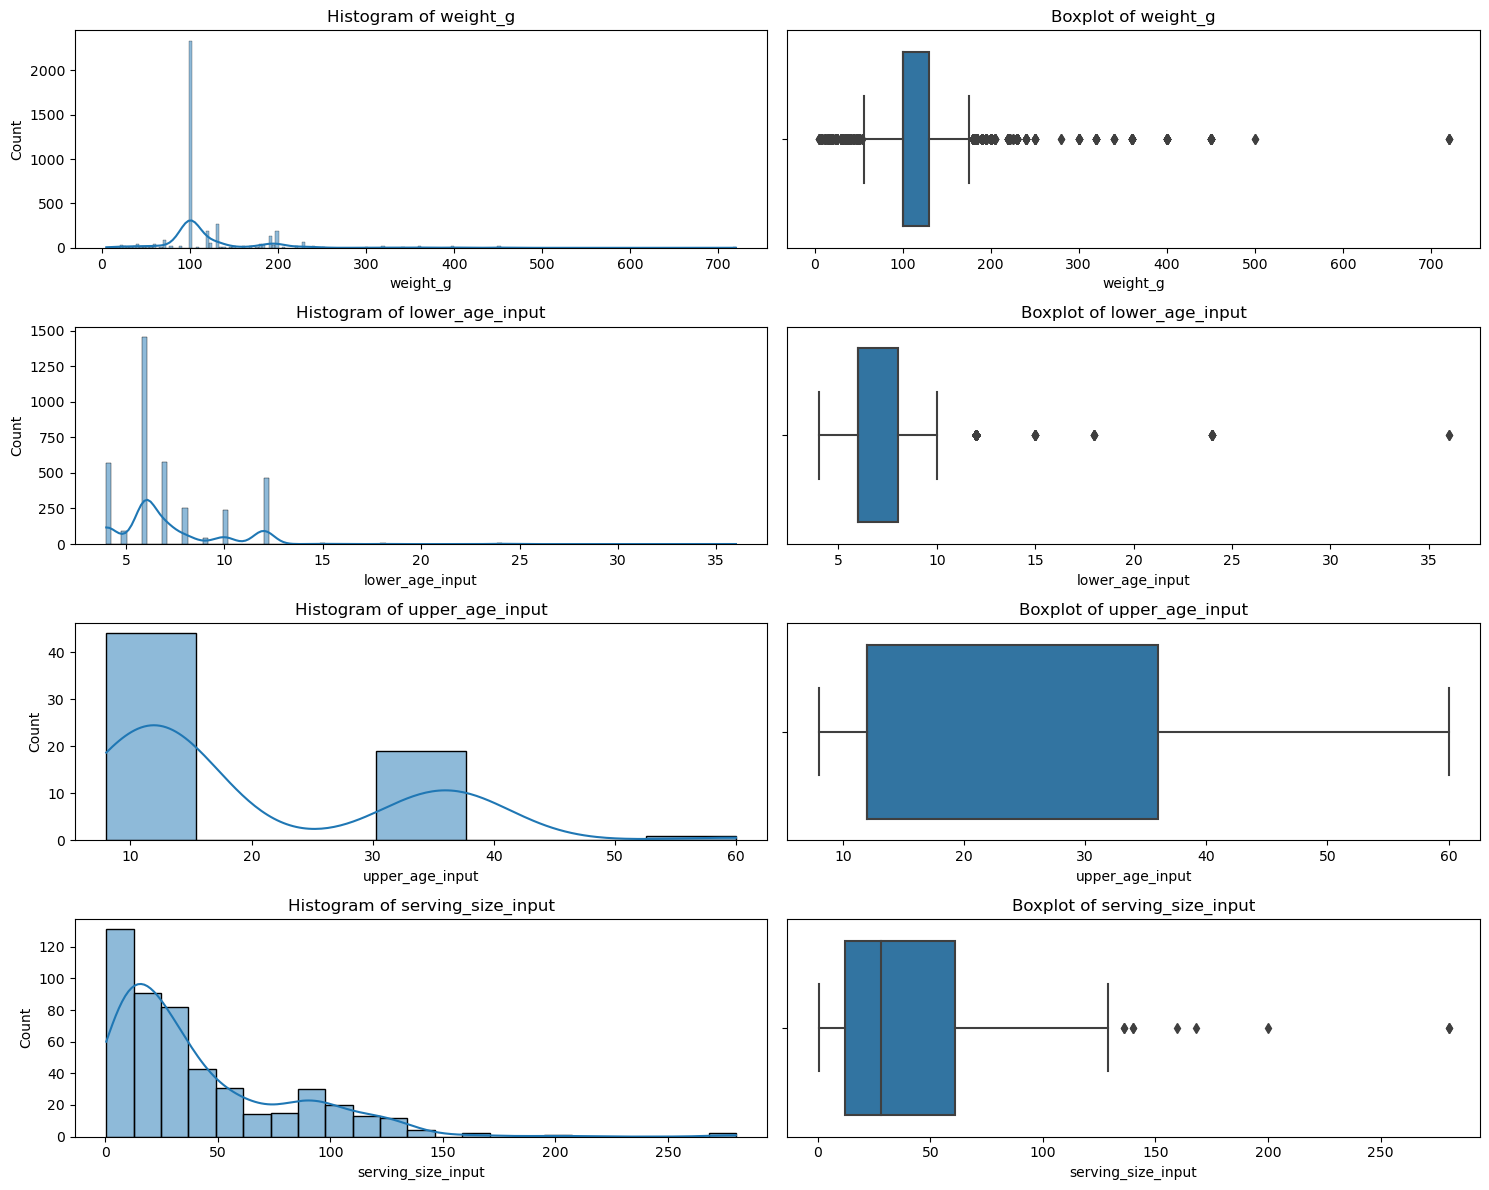

In [31]:
# List of numerical columns to examine
numerical_columns = ['weight_g', 'lower_age_input', 'upper_age_input', 'serving_size_input']

# Create histograms and boxplots for numerical columns
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns):
    # Histogram
    plt.subplot(len(numerical_columns), 2, 2*i+1)
    sns.histplot(nppm_baby_food_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(len(numerical_columns), 2, 2*i+2)
    sns.boxplot(x=nppm_baby_food_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


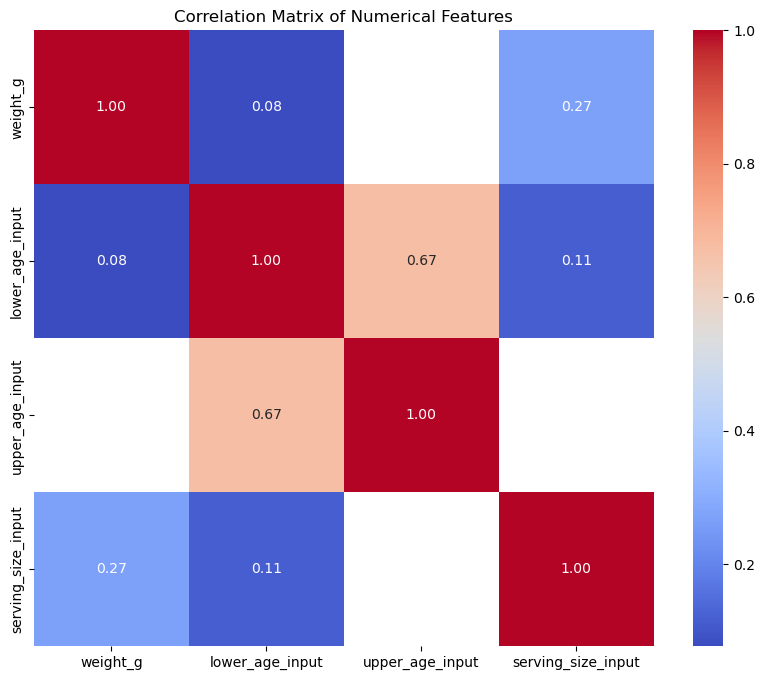

In [32]:
# Correlation matrix
correlation_matrix = nppm_baby_food_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Categories of Baby Food

In [36]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/nppm_baby_food.csv'
nppm_baby_food_df = pd.read_csv(file_path)

# Create a new column for the category group by extracting the first character
nppm_baby_food_df['category_group'] = nppm_baby_food_df['category_id'].str.extract(r'(\d+)')

# Convert the extracted numbers to integers if needed
nppm_baby_food_df['category_group'] = nppm_baby_food_df['category_group'].astype(int)

# Verify the new column
print(nppm_baby_food_df[['category_id', 'category_group']].head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/nppm_baby_food.csv'

In [5]:
category_counts = nppm_baby_food_df['category_id'].value_counts().sort_index()

category_counts

category_id
1a Cereal containing milk                                            372
1b Cereal made with water                                             64
1b Cereal served with water                                          112
1c Cereal made with milk                                             240
1c Cereal served with milk                                            83
2a Dairy, no cheese                                                  156
3.1a Fruit product, pureed                                          1138
3.1b Fruit product, not pureed                                        17
3.2a Vegetable product, pureed                                       111
3.2b Vegetable product, not pureed                                     1
4.1a Meal, no named protein, pureed                                  144
4.1b Meal, no named protein, not pureed                              128
4.2a Meal with cheese in name, pureed                                 22
4.2b Meal with cheese in name, not pure

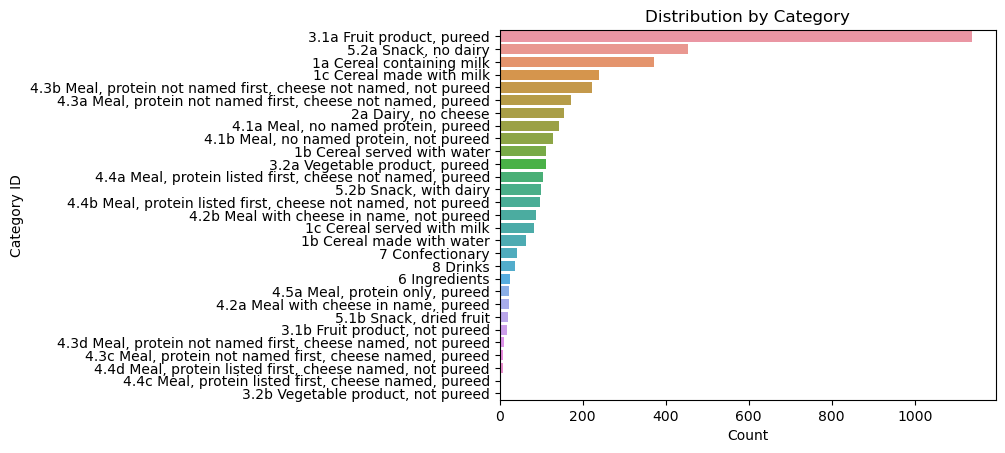

In [6]:
# Create a count plot for category_id or another category column
sns.countplot(y=nppm_baby_food_df['category_id'], order=nppm_baby_food_df['category_id'].value_counts().index)

# Add labels and a title
plt.title("Distribution by Category")
plt.xlabel("Count")
plt.ylabel("Category ID")

# Display the plot
plt.show()

### Countries/Region of Data Submission

In [7]:
# Group by country and count pass/fail ratios
country_nutrition_means = nppm_baby_food_df.groupby('submission_country')[
    ['energy_density_result', 'fat_density_result', 'sugar_density_result', 'protein_density_result']
].apply(lambda x: x.apply(lambda y: y.value_counts(normalize=True)))

# Reset the index to include the country column
country_nutrition_means.reset_index(inplace=True)

# Display to inspect
country_nutrition_means.head()


,submission_country,level_1,energy_density_result,fat_density_result,sugar_density_result,protein_density_result
0,AU,fail,NaN,NaN,NaN,1.0
1,AU,pass,1.0,1.000000,1.000000,NaN
2,BE,fail,0.5,0.166667,0.833333,NaN
3,BE,pass,0.5,0.833333,0.166667,NaN
4,CH,fail,NaN,1.000000,NaN,1.0


In [8]:
# Count the number of entries per region
region_counts = nppm_baby_food_df['WHO_REGION'].value_counts()

# Display the counts
print(region_counts)


WHO_REGION
Europe             3689
Western Pacific     299
Americas              4
South-East Asia       1
Name: count, dtype: int64


In [9]:
# Count the number of entries per region
region_counts = nppm_baby_food_df['WHO_REGION'].value_counts()

# Convert to a DataFrame for visualization
region_counts_df = region_counts.reset_index()
region_counts_df.columns = ['WHO_REGION', 'Count']


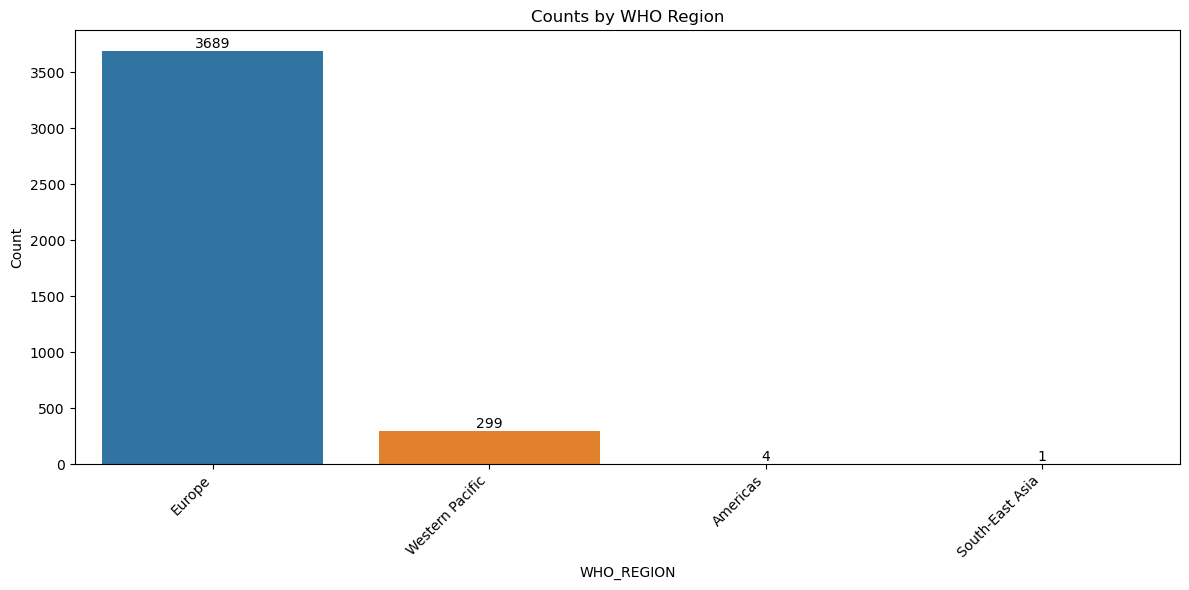

In [10]:
# Create a bar plot for the region counts
plt.figure(figsize=(12, 6))

sns.barplot(data=region_counts_df, x='WHO_REGION', y='Count')

plt.xticks(rotation=45, ha='right')
plt.title("Counts by WHO Region")

# Add value counts to each bar
for idx, row in region_counts_df.iterrows():
    plt.text(idx, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [11]:
# Count categories by region
region_category_counts = nppm_baby_food_df.groupby(['WHO_REGION', 'category_id']).size().unstack()

# Display to inspect the counts
region_category_counts

category_id,1a Cereal containing milk,1b Cereal made with water,1b Cereal served with water,1c Cereal made with milk,1c Cereal served with milk,"2a Dairy, no cheese","3.1a Fruit product, pureed","3.1b Fruit product, not pureed","3.2a Vegetable product, pureed","3.2b Vegetable product, not pureed","4.1a Meal, no named protein, pureed","4.1b Meal, no named protein, not pureed","4.2a Meal with cheese in name, pureed","4.2b Meal with cheese in name, not pureed","4.3a Meal, protein not named first, cheese not named, pureed","4.3b Meal, protein not named first, cheese not named, not pureed","4.3c Meal, protein not named first, cheese named, pureed","4.3d Meal, protein not named first, cheese named, not pureed","4.4a Meal, protein listed first, cheese not named, pureed","4.4b Meal, protein listed first, cheese not named, not pureed","4.4c Meal, protein listed first, cheese named, pureed","4.4d Meal, protein listed first, cheese named, not pureed","4.5a Meal, protein only, pureed","5.1b Snack, dried fruit","5.2a Snack, no dairy","5.2b Snack, with dairy",6 Ingredients,7 Confectionary,8 Drinks
WHO_REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Americas,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,347.0,63.0,57.0,240.0,57.0,143.0,1096.0,17.0,108.0,1.0,144.0,128.0,22.0,87.0,169.0,220.0,9.0,10.0,104.0,97.0,2.0,7.0,22.0,9.0,365.0,69.0,24.0,41.0,31.0
South-East Asia,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Pacific,23.0,1.0,53.0,NaN,25.0,13.0,42.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,89.0,31.0,NaN,NaN,5.0


In [12]:
# Count categories by region
region_category_counts = nppm_baby_food_df.groupby(['submission_country', 'category_id']).size().unstack()

# Display to inspect the counts
region_category_counts

category_id,1a Cereal containing milk,1b Cereal made with water,1b Cereal served with water,1c Cereal made with milk,1c Cereal served with milk,"2a Dairy, no cheese","3.1a Fruit product, pureed","3.1b Fruit product, not pureed","3.2a Vegetable product, pureed","3.2b Vegetable product, not pureed","4.1a Meal, no named protein, pureed","4.1b Meal, no named protein, not pureed","4.2a Meal with cheese in name, pureed","4.2b Meal with cheese in name, not pureed","4.3a Meal, protein not named first, cheese not named, pureed","4.3b Meal, protein not named first, cheese not named, not pureed","4.3c Meal, protein not named first, cheese named, pureed","4.3d Meal, protein not named first, cheese named, not pureed","4.4a Meal, protein listed first, cheese not named, pureed","4.4b Meal, protein listed first, cheese not named, not pureed","4.4c Meal, protein listed first, cheese named, pureed","4.4d Meal, protein listed first, cheese named, not pureed","4.5a Meal, protein only, pureed","5.1b Snack, dried fruit","5.2a Snack, no dairy","5.2b Snack, with dairy",6 Ingredients,7 Confectionary,8 Drinks
submission_country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AU,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
CH,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ES,2.0,7.0,NaN,161.0,NaN,55.0,446.0,NaN,3.0,NaN,48.0,8.0,2.0,NaN,134.0,18.0,3.0,NaN,26.0,4.0,NaN,NaN,5.0,NaN,82.0,1.0,NaN,10.0,25.0
GB,100.0,25.0,17.0,63.0,27.0,27.0,407.0,13.0,83.0,1.0,57.0,113.0,15.0,84.0,18.0,197.0,6.0,9.0,68.0,88.0,2.0,6.0,1.0,3.0,229.0,33.0,8.0,24.0,3.0
GD,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Count categories by region
region_category_counts = nppm_baby_food_df.groupby(['DisplayString', 'category_id']).size().unstack()

# Display to inspect the counts
region_category_counts

category_id,1a Cereal containing milk,1b Cereal made with water,1b Cereal served with water,1c Cereal made with milk,1c Cereal served with milk,"2a Dairy, no cheese","3.1a Fruit product, pureed","3.1b Fruit product, not pureed","3.2a Vegetable product, pureed","3.2b Vegetable product, not pureed","4.1a Meal, no named protein, pureed","4.1b Meal, no named protein, not pureed","4.2a Meal with cheese in name, pureed","4.2b Meal with cheese in name, not pureed","4.3a Meal, protein not named first, cheese not named, pureed","4.3b Meal, protein not named first, cheese not named, not pureed","4.3c Meal, protein not named first, cheese named, pureed","4.3d Meal, protein not named first, cheese named, not pureed","4.4a Meal, protein listed first, cheese not named, pureed","4.4b Meal, protein listed first, cheese not named, not pureed","4.4c Meal, protein listed first, cheese named, pureed","4.4d Meal, protein listed first, cheese named, not pureed","4.5a Meal, protein only, pureed","5.1b Snack, dried fruit","5.2a Snack, no dairy","5.2b Snack, with dairy",6 Ingredients,7 Confectionary,8 Drinks
DisplayString,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
China,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Grenada,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ireland,25.0,NaN,8.0,NaN,15.0,5.0,5.0,1.0,5.0,NaN,5.0,7.0,5.0,3.0,5.0,5.0,NaN,1.0,5.0,5.0,NaN,1.0,NaN,NaN,10.0,3.0,NaN,NaN,NaN
Kyrgyzstan,99.0,5.0,5.0,NaN,NaN,16.0,124.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,16.0,2.0,14.0,NaN,NaN,NaN,NaN


In [14]:
# Get the value counts for the 'submission_country' column
country_counts = nppm_baby_food_df['submission_country'].value_counts()

# Display the counts
print(country_counts)

submission_country
GB    1727
ES    1040
TR     493
KG     300
MY     296
IE     119
BE       6
GD       4
AU       2
CH       2
DK       1
IN       1
DE       1
CN       1
Name: count, dtype: int64


In [15]:
# Get the value counts for the 'submission_country' column
country_counts = nppm_baby_food_df['DisplayString'].value_counts()

# Display the counts
print(country_counts)

DisplayString
United Kingdom of Great Britain and Northern Ireland    1727
Spain                                                   1040
Turkiye                                                  493
Kyrgyzstan                                               300
Malaysia                                                 296
Ireland                                                  119
Belgium                                                    6
Grenada                                                    4
Australia                                                  2
Switzerland                                                2
Denmark                                                    1
India                                                      1
Germany                                                    1
China                                                      1
Name: count, dtype: int64


In [16]:
# Get the value counts for the 'DisplayString' column
display_string_counts = nppm_baby_food_df['DisplayString'].value_counts()

# Convert to a DataFrame for visualization
display_string_counts_df = display_string_counts.reset_index()
display_string_counts_df.columns = ['DisplayString', 'Count']


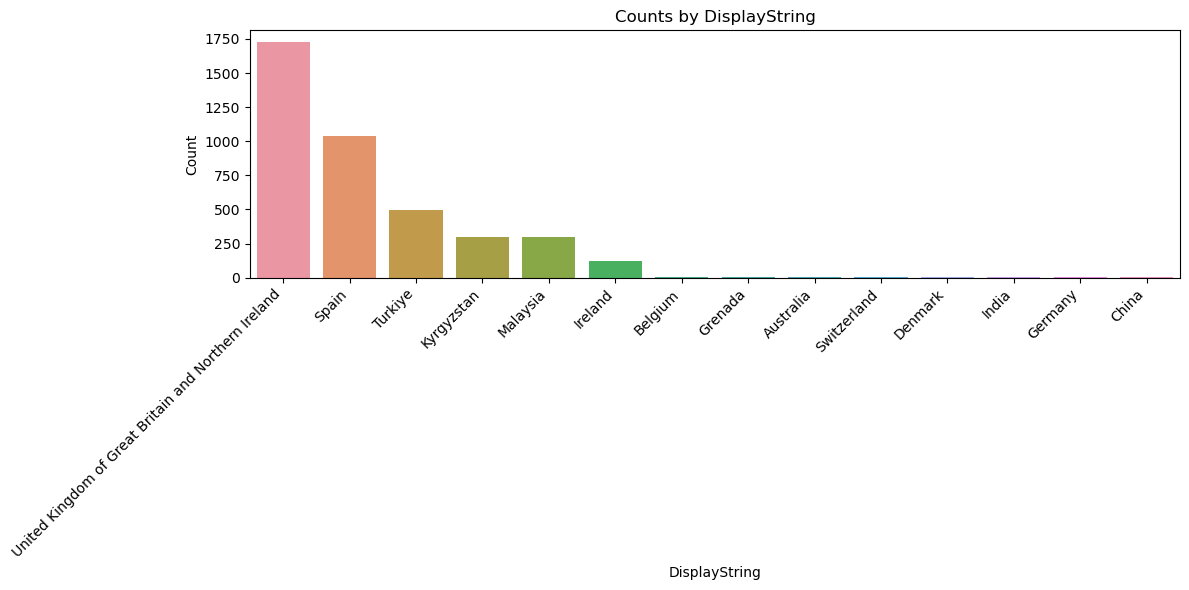

In [17]:
# Create a bar plot for the counts
plt.figure(figsize=(12, 6))

sns.barplot(data=display_string_counts_df, x='DisplayString', y='Count')

plt.xticks(rotation=45, ha='right')
plt.title("Counts by DisplayString")
plt.tight_layout()
plt.show()


In [18]:
# Count the distribution of 'submission_sector'
sector_counts = nppm_baby_food_df['submission_sector'].value_counts()

# Convert to a DataFrame for visualization
sector_counts_df = sector_counts.reset_index()
sector_counts_df.columns = ['submission_sector', 'Count']


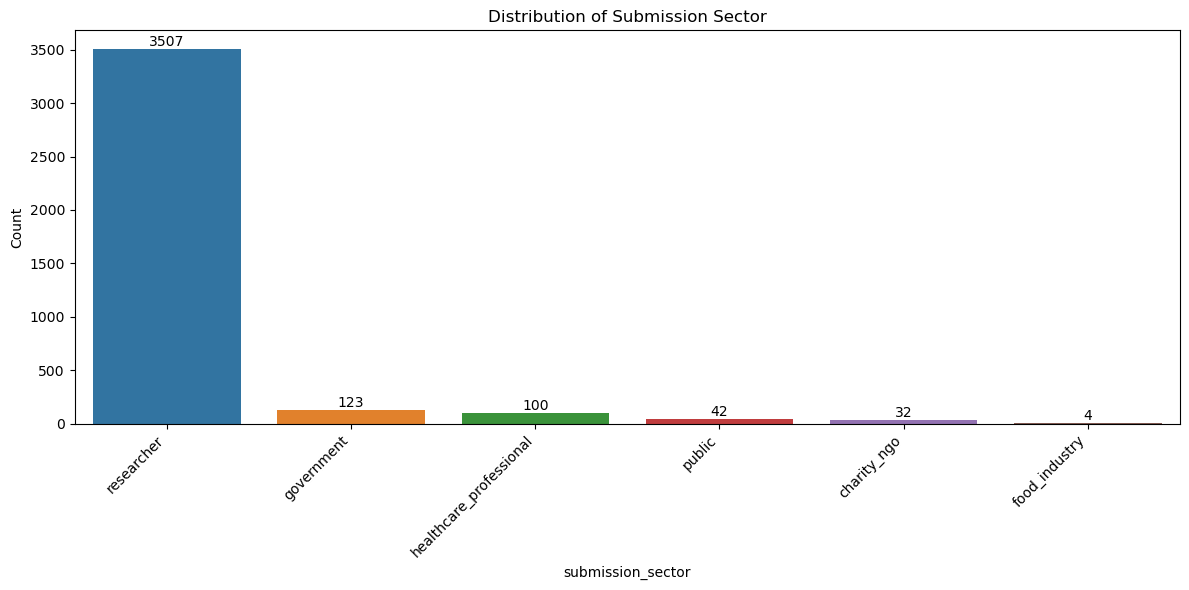

In [19]:
# Create the bar plot
plt.figure(figsize=(12, 6))

sns.barplot(data=sector_counts_df, x='submission_sector', y='Count')

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Submission Sector")

# Add value counts to each bar
for idx, row in sector_counts_df.iterrows():
    plt.text(idx, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [20]:
# Get the unique values from the '_id' column
unique_ids = nppm_baby_food_df['product_name'].unique()

# Display the unique values
unique_ids


array(['Sütlü meyveli pirinçli', 'Sütlü pirinçli', 'Sütlü muzlu pirinçli',
       ..., 'Organic fruit bears', 'Breastmilk', 'baby chopped noodles'],
      dtype=object)

In [21]:
# Count the number of unique IDs
unique_id_count = len(unique_ids)

print(f"Number of unique IDs: {unique_id_count}")

Number of unique IDs: 2305


In [22]:
# Convert to datetime format
nppm_baby_food_df['submission_datetime'] = pd.to_datetime(nppm_baby_food_df['submission_datetime'], errors='coerce')


In [23]:
# Find the earliest and latest times
earliest_time = nppm_baby_food_df['submission_datetime'].min()
latest_time = nppm_baby_food_df['submission_datetime'].max()

print(f"Earliest submission time: {earliest_time}")
print(f"Latest submission time: {latest_time}")

Earliest submission time: 2022-11-04 14:20:34.005000
Latest submission time: 2024-04-23 16:00:32.658000


In [24]:
nppm_baby_food_df.columns

Index(['category_id', 'product_name', 'brand', 'weight_g',
       'energy_density_input', 'energy_density_result', 'fat_density_input',
       'fat_density_result', 'sugar_density_input', 'sugar_density_result',
       'protein_density_input', 'protein_density_result',
       'sodium_density_input', 'sodium_density_result',
       'protein_percent_input', 'protein_percent_result',
       'fruit_percent_input', 'fruit_percent_result',
       'dry_fruit_percent_input', 'dry_fruit_percent_result',
       'free_sugars_input', 'free_sugars_result', 'water_added_input',
       'water_added_result', 'lower_age_input', 'lower_age_result',
       'upper_age_input', 'upper_age_result', 'serving_size_input',
       'serving_size_result', 'claims_input', 'claims_result',
       'assess_name_input', 'assess_name_result', 'assess_ingredients_input',
       'assess_ingredients_result', 'spout_input', 'spout_result',
       'preparation_input', 'preparation_result', 'breastfeeding_input',
       'brea